<a href="https://colab.research.google.com/github/Erick2621/pdsei-2023-erick-alonso/blob/LABORATORIO2/Copia_de_Laboratorio_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Librerías

In [ ]:
import numpy as np                  ## Se usa para el manejo de arrays
import matplotlib.pyplot as plt     ## Se usa para visualizar gráficos
import pylab as pl
import time
from IPython import display
plt.style.use(['dark_background'])  ## Se usa para gráficas de temas oscuros

In [ ]:
##!wget -nc https://github.com/Erick2621/pdsei-2023-erick-alonso/blob/main/Lab1/pajaro.wav
!wget -nc pajaro.wav
!pip install pysoundfile
!pip install bitstring

--2023-10-03 03:20:32--  http://pajaro.wav/
Resolving pajaro.wav (pajaro.wav)... failed: Name or service not known.
wget: unable to resolve host address ‘pajaro.wav’


In [ ]:
import IPython
IPython.display.Audio('pajaro.wav')

Tasa de muestreo: 44100 muestreo/segundo
Tamaño de señal: 44100 muestras
Duración: 1.000 segundos


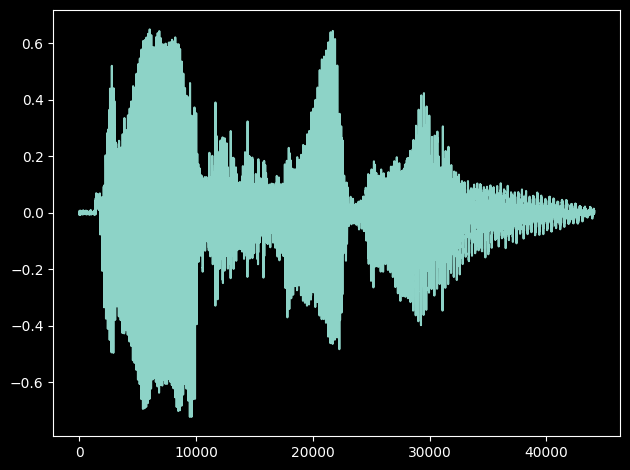

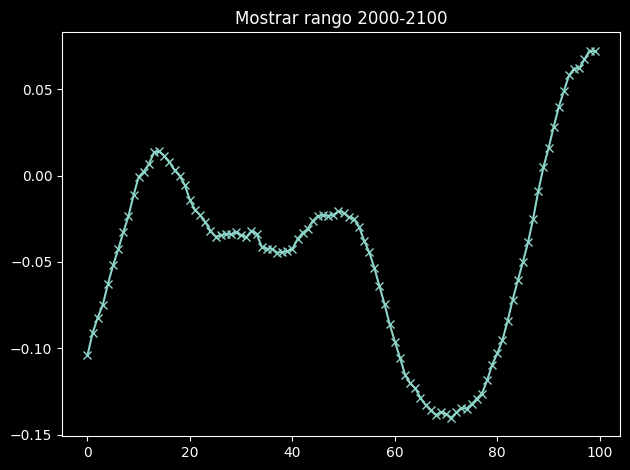

In [ ]:
import soundfile

audio_signal, fm = soundfile.read('pajaro.wav')
audio_izquierdo=audio_signal[:, 0]
type(audio_signal)

print('Tasa de muestreo: {} muestreo/segundo'.format(fm))
print('Tamaño de señal: {} muestras'.format(audio_izquierdo.shape[0]))
print('Duración: {:.3f} segundos'.format(audio_izquierdo.shape[0] / fm))
plt.plot(audio_izquierdo)
plt.tight_layout()
plt.figure()
plt.plot(audio_izquierdo[2000:2100], marker='x')
plt.title('Mostrar rango 2000-2100')
plt.tight_layout()

### **Creación del kernel**

In [ ]:

kernel=np.exp(-np.linspace(-2,2,31)**2)
len_x=len(audio_izquierdo)
len_h=len(kernel)

### **Mostrando señales creadas**

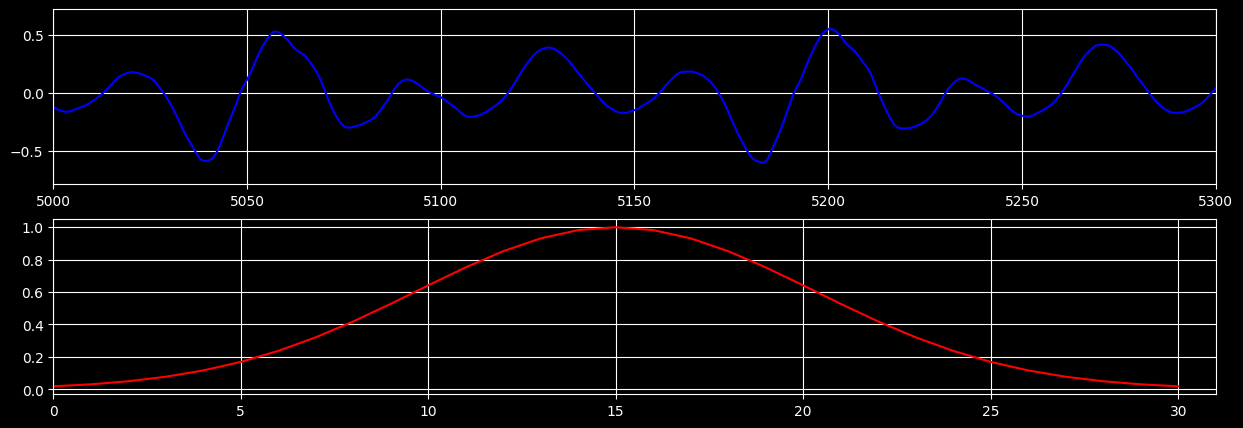

In [ ]:
plt.figure(figsize=(15,5))

t = np.arange(0,1,1/fm) # Vector tiempo.
n = len(t)

plt.subplot(211)
plt.plot( audio_izquierdo,'b')
plt.xlim([5000,5300])
plt.grid(True)
plt.subplot(212)
plt.plot(kernel,'r')
plt.xlim([0,len_h])
plt.grid(True)
plt.show()

 * **Cálculo y gráfica de la convolución**

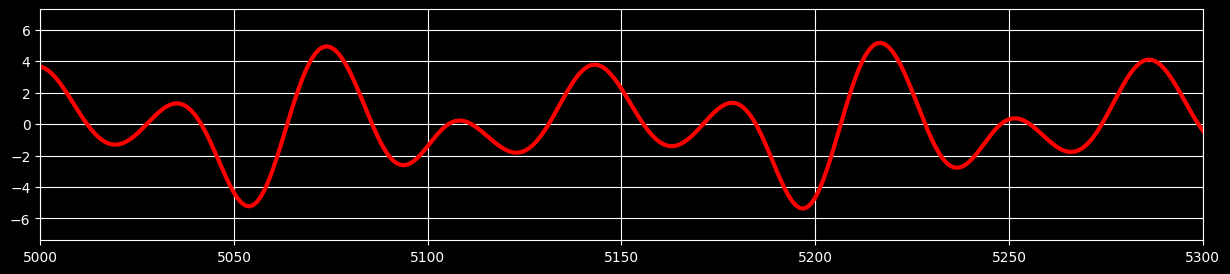

In [ ]:
y_n=np.convolve(audio_izquierdo,kernel)

plt.figure(figsize=(15,3))
plt.plot(y_n,"r", linewidth=3)
plt.xlim([5000,5300])
plt.grid(True)
#plt.plot(x_n)
plt.show()

In [ ]:
soundfile.write('pajaro_original.wav', audio_signal, fm)
soundfile.write('pajaro_convolve.wav', y_n, fm)
IPython.display.Audio('pajaro_convolve.wav')

In [ ]:
IPython.display.Audio('pajaro_original.wav')

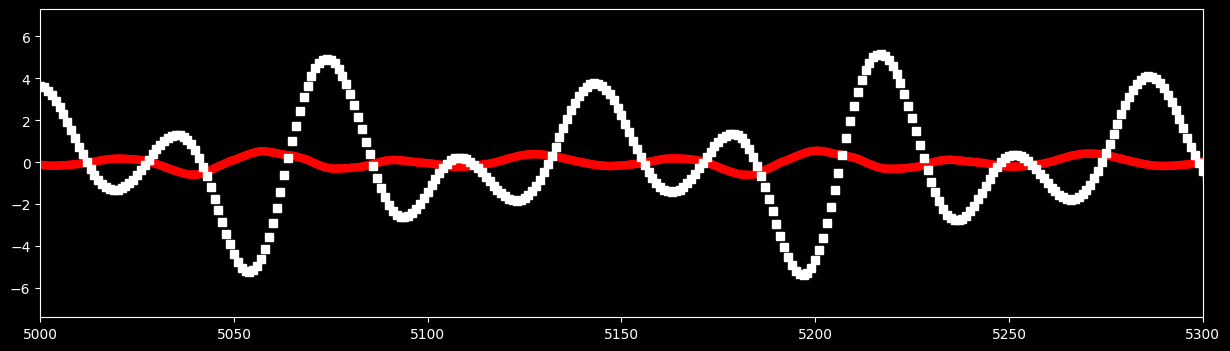

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(audio_signal,'r',linewidth=6)
plt.plot(y_n,'ws')

# Establece los límites del eje x
plt.xlim(5000, 5300)

# Muestra la gráfica
plt.show()

**La función correlate en vez de convolve **

 * **Cálculo y gráfica de la correlacion**

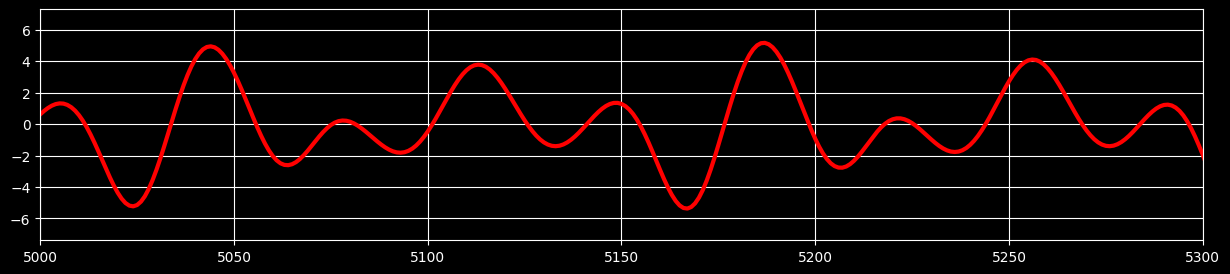

In [ ]:
y_n2=np.correlate(audio_izquierdo,kernel)

plt.figure(figsize=(15,3))
plt.plot(y_n2,"r", linewidth=3)
plt.xlim([5000,5300])
plt.grid(True)
#plt.plot(x_n)
plt.show()

In [ ]:
soundfile.write('pajaro_correlate.wav', y_n2, fm)
IPython.display.Audio('pajaro_correlate.wav')

In [ ]:
IPython.display.Audio('pajaro_original.wav')

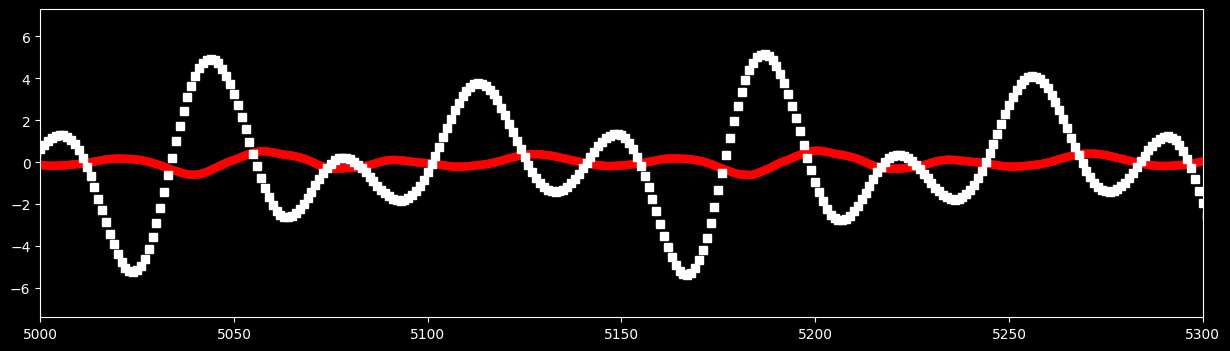

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(audio_signal,'r',linewidth=6)
plt.plot(y_n2,'ws')

# Establece los límites del eje x
plt.xlim(5000,5300)

# Muestra la gráfica
plt.show()